In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
print(test_new.shape)  #ROWS, COLUMNS

(25000, 4223)


In [6]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [7]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

8


In [8]:
size_column = len(multivariate_column_label)
print(size_column)

8


In [9]:
multivariate_data=test_new.iloc[2000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [10]:
multivariate_data.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


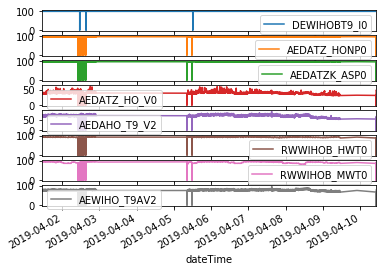

In [11]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.show()

In [12]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  5


In [13]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [14]:
print(multivariate_data.shape)
print(multivariate_data_modify.shape)

(8000, 8)
(7995, 8)


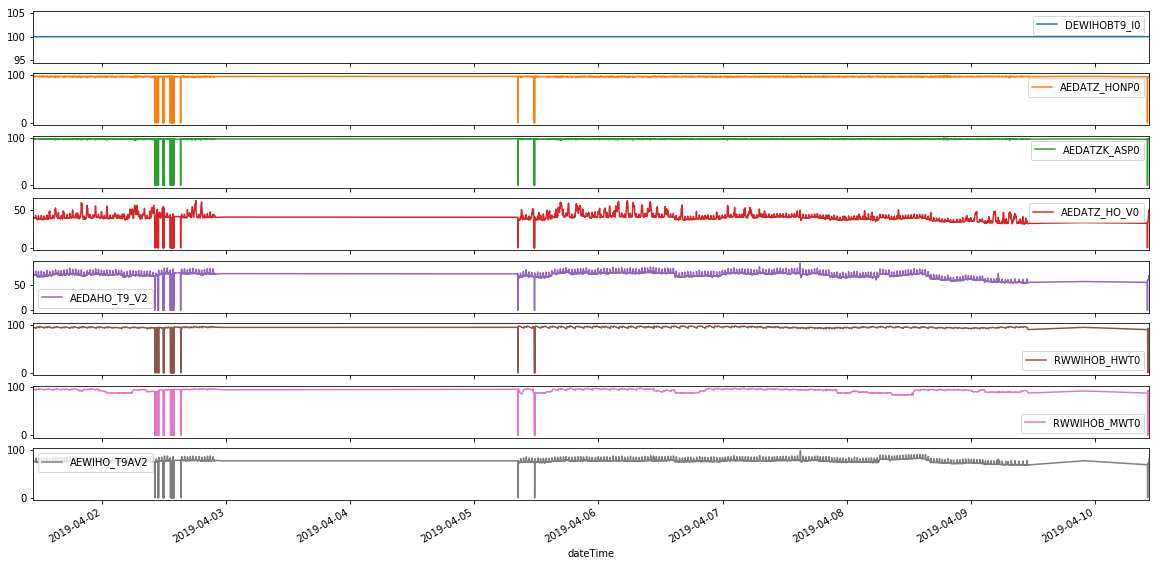

In [15]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.legend(loc='upper left')
plt.show()

In [16]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

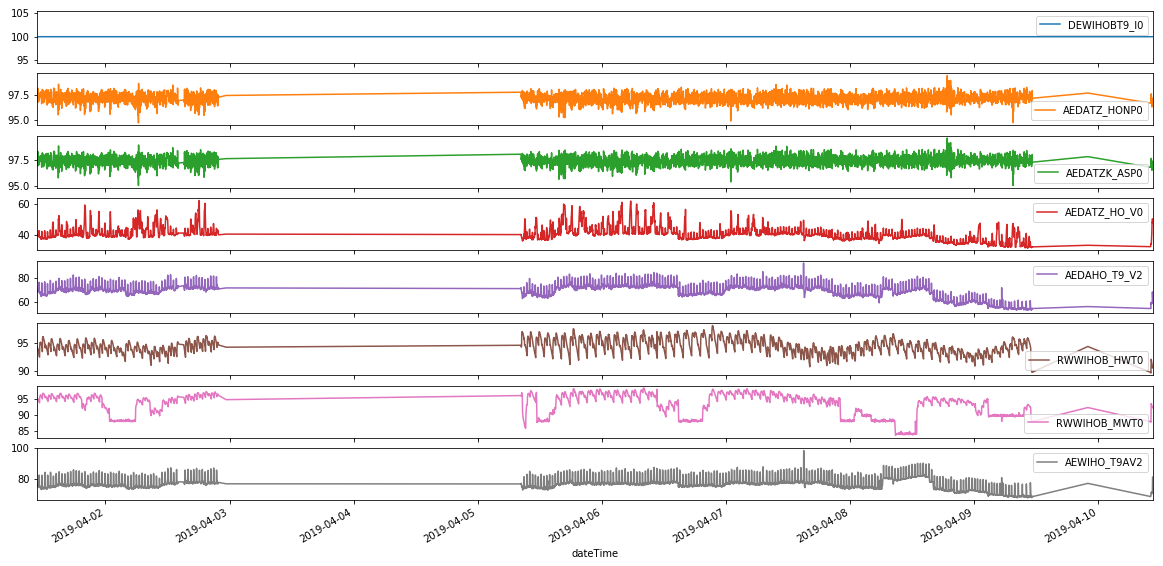

In [17]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [18]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [19]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_zero_resample.shape)

(7937, 8)
(12951, 8)


In [20]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [21]:
print(multivariate_data_drop_zero_interpolate.shape)

(12951, 8)


In [22]:
multivariate_data_drop_zero_interpolate.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


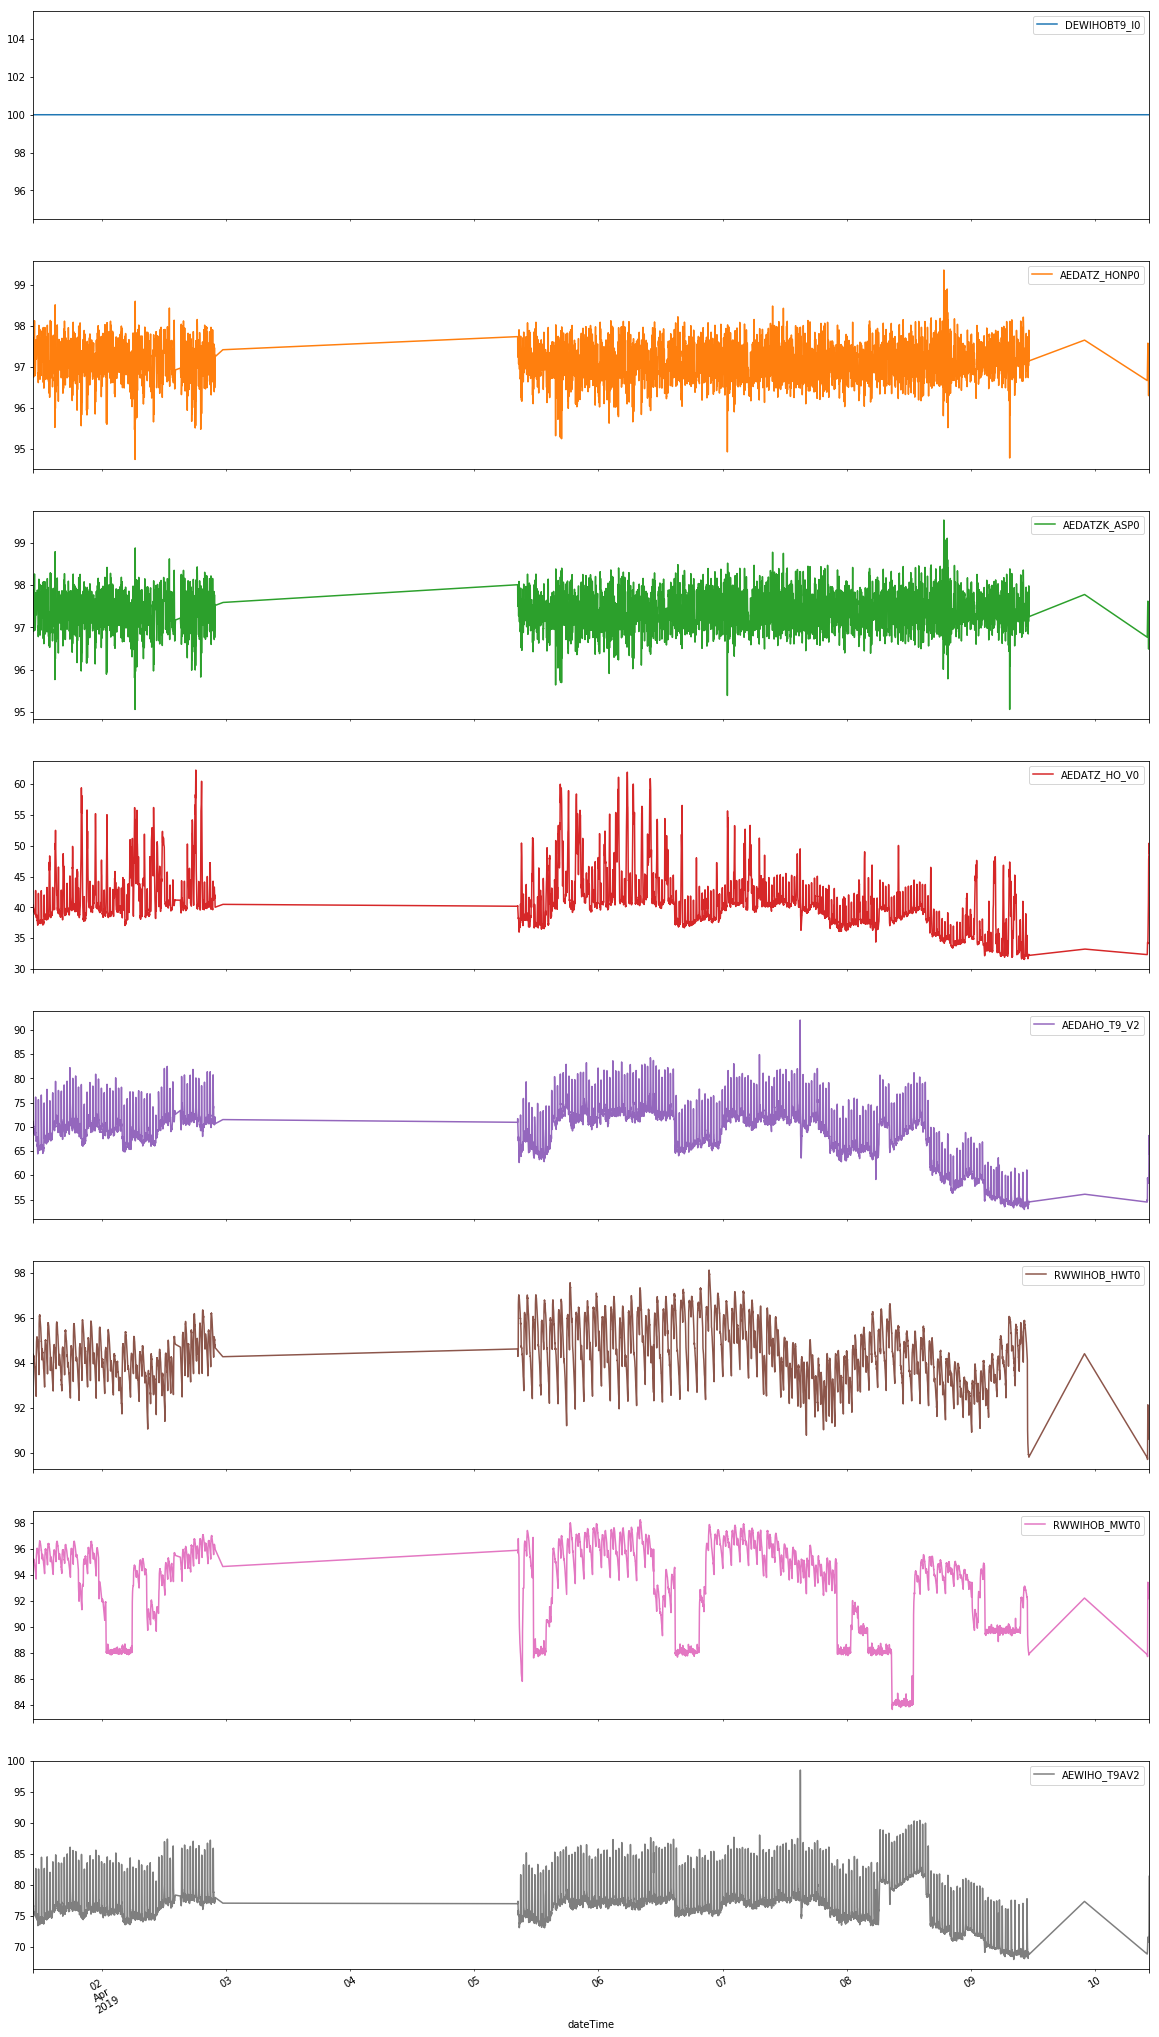

In [24]:
dx = multivariate_data_drop_zero_interpolate.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,40)
plt.show()

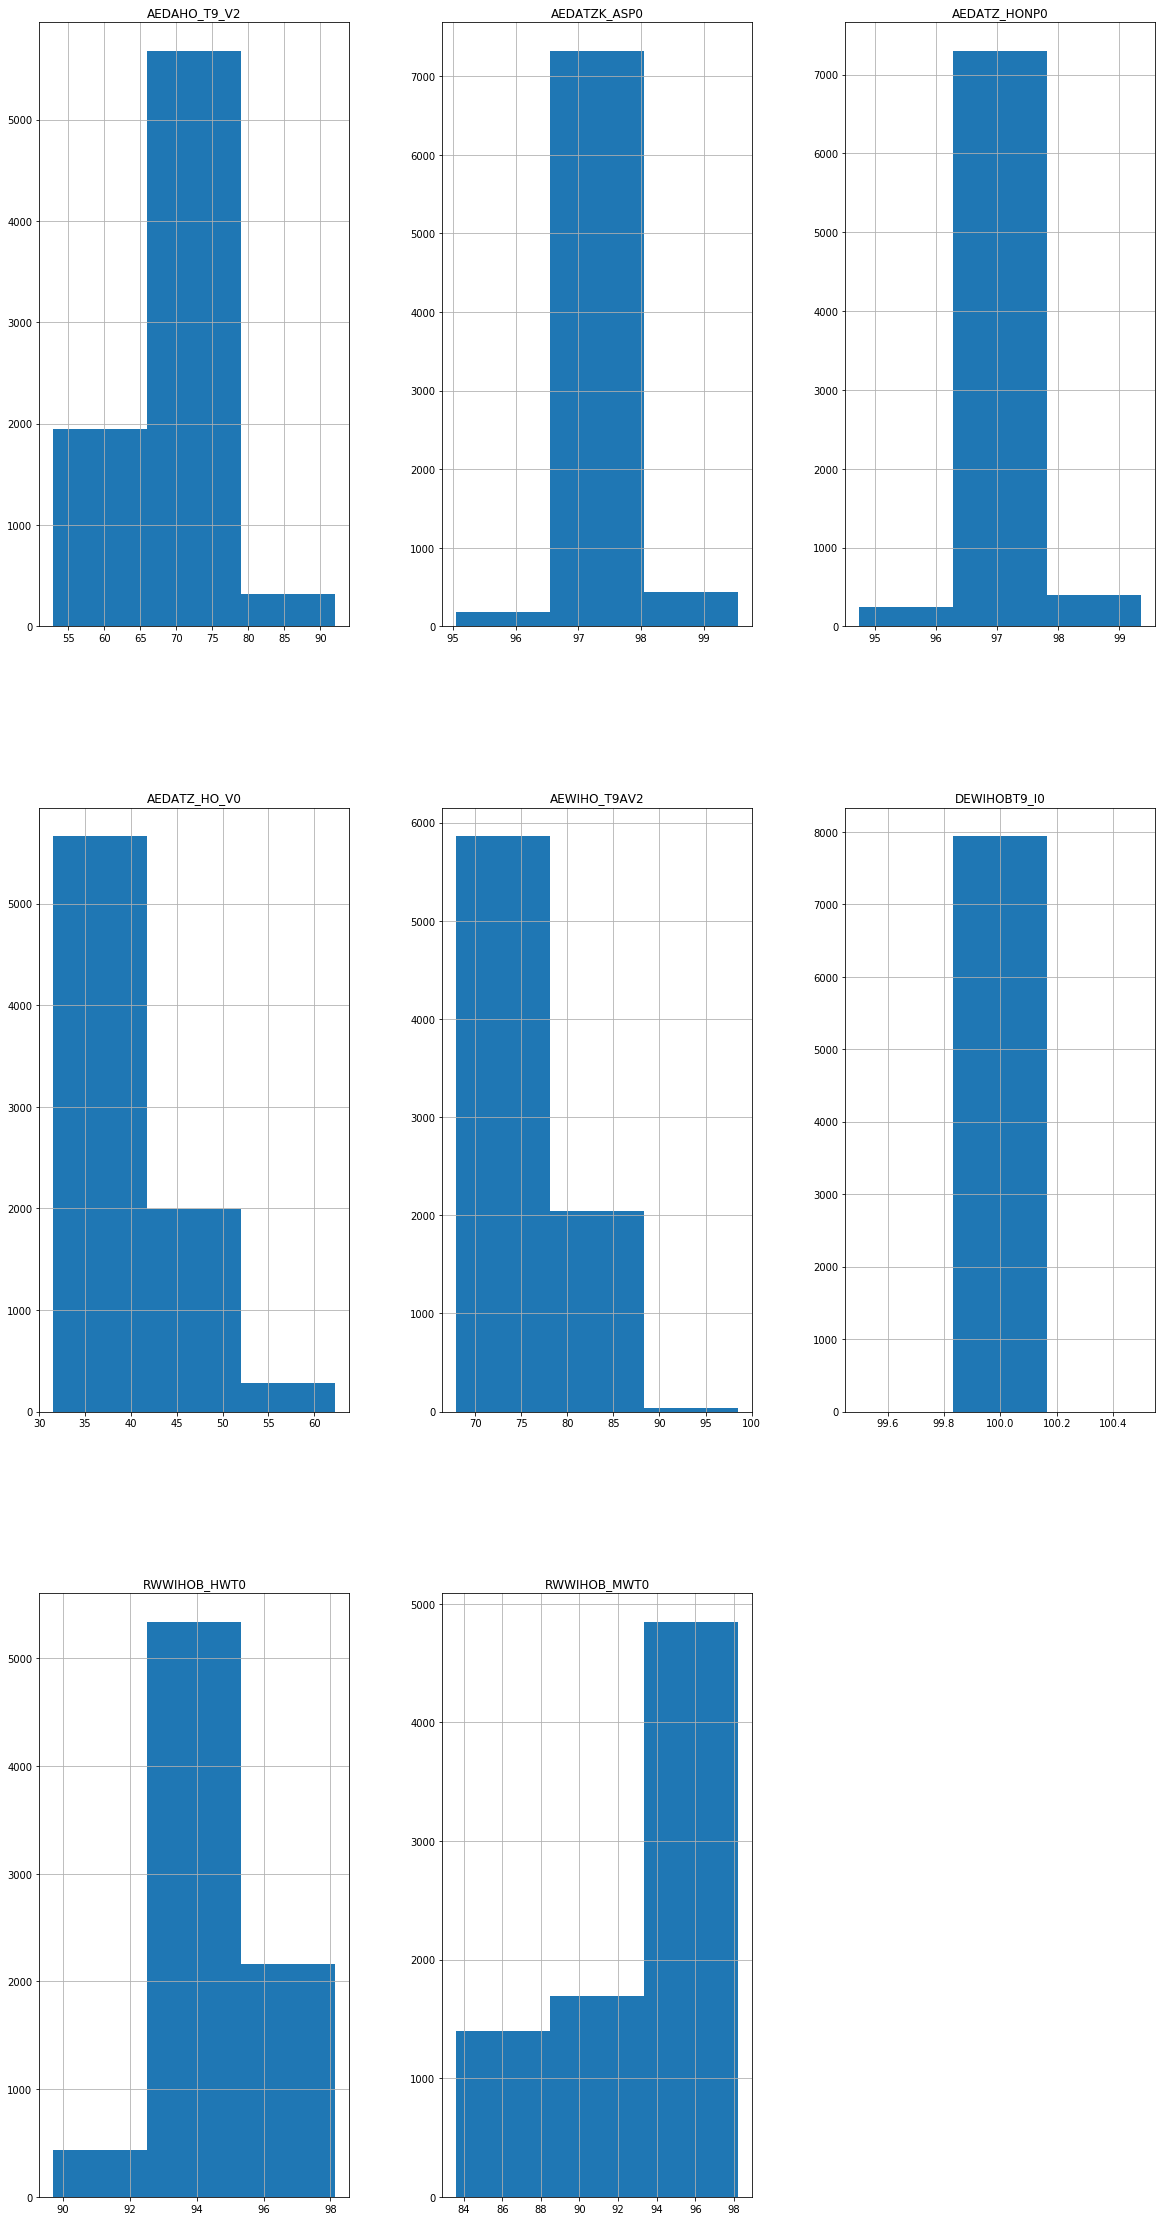

In [25]:
hist = multivariate_data_drop_zero.hist(bins=3)

In [26]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+1
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [27]:
print(multivariate_data_drop_zero.shape)
print(drop_consecutive_same_value_zero.shape)
print(drop_consecutive_same_value_interpolate.shape)

(7937, 8)
(7930, 8)
(12944, 8)


In [28]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)

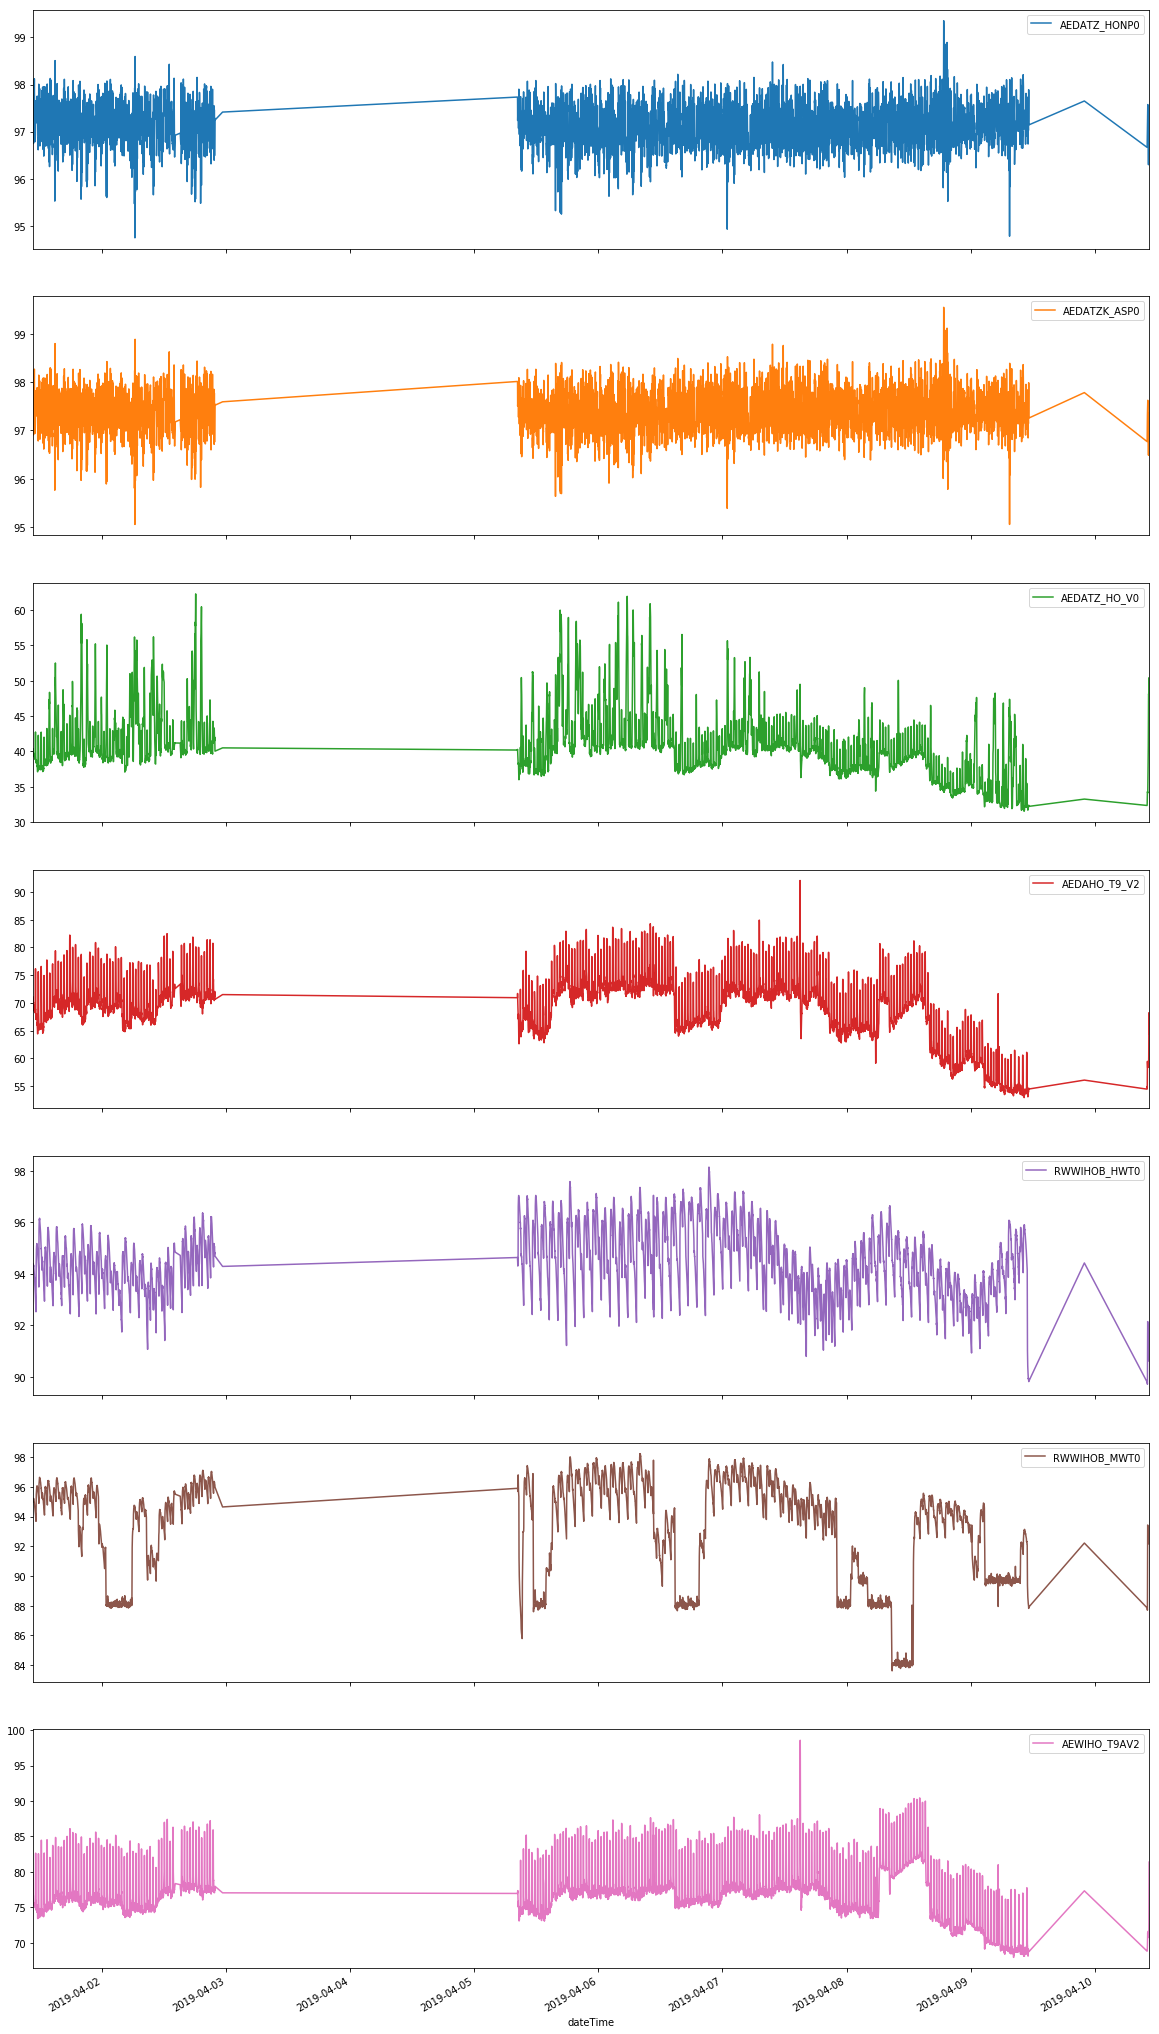

In [29]:
dx = new_dataframe.plot(subplots=True, layout=(size_column-1,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [30]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)
print('shape of new_dataframe: ', new_dataframe.shape)

shape of multivariate_data:  (8000, 8)
shape of multivariate_data_modify:  (7995, 8)
shape of multivariate_data_drop_zero:  (7937, 8)
shape of new_dataframe:  (7930, 7)


In [31]:
new_dataframe.corr()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
AEDATZ_HONP0,1.000000,0.986607,-0.375157,-0.161240,-0.052884,-0.066476,-0.042117
AEDATZK_ASP0,0.986607,1.000000,-0.303132,-0.108016,-0.045979,-0.045416,0.018198
AEDATZ_HO_V0,-0.375157,-0.303132,1.000000,0.612193,0.142894,0.269080,0.395302
AEDAHO_T9_V2,-0.161240,-0.108016,0.612193,1.000000,0.149537,0.359298,0.768550
RWWIHOB_HWT0,-0.052884,-0.045979,0.142894,0.149537,1.000000,0.246607,-0.005621
RWWIHOB_MWT0,-0.066476,-0.045416,0.269080,0.359298,0.246607,1.000000,0.104084
AEWIHO_T9AV2,-0.042117,0.018198,0.395302,0.768550,-0.005621,0.104084,1.000000


In [32]:
new_dataframe_1 = new_dataframe.drop(['RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [33]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
# dataset=np.array(multivariate_data_drop_zero)
dataset=np.array(new_dataframe_1)

In [34]:
NumberOfElements=int(len(dataset)*0.9)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  7137
dataset length:  7930
train_input shape:  (7137, 4)
train_output shape:  (7137,)
test_input shape:  (793, 4)
test_output shape:  (793,)


# Stochastic Gradient Descent

In [35]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [36]:
clf.fit(train_input, train_output)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [38]:
predicted_output = clf.predict(test_input)

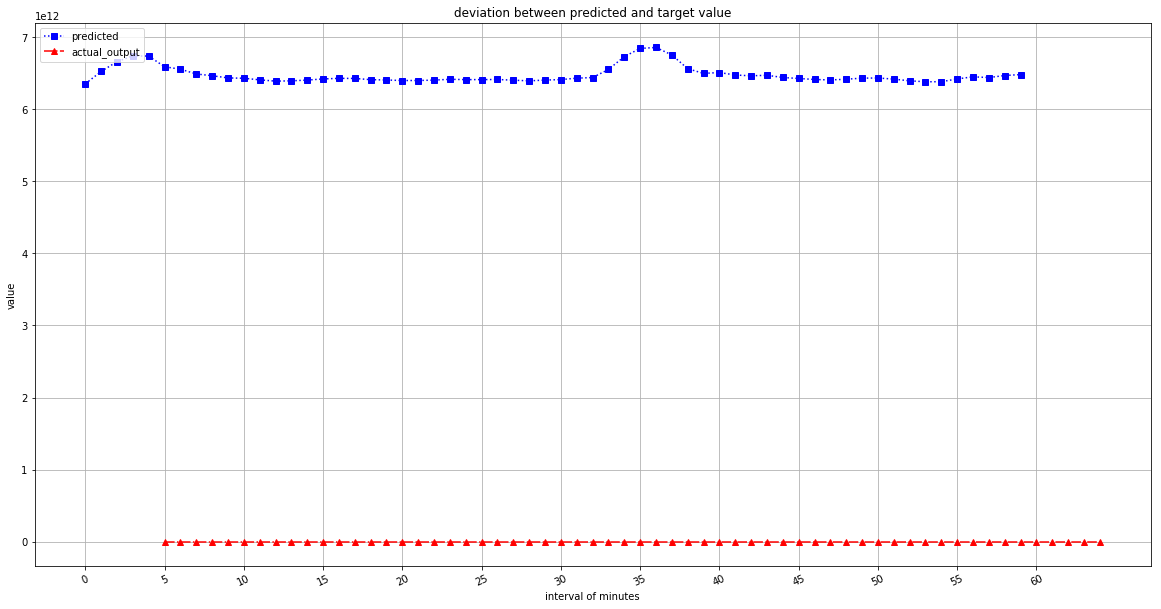

In [39]:
actual_data = range(65)


plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

<class 'numpy.ndarray'>


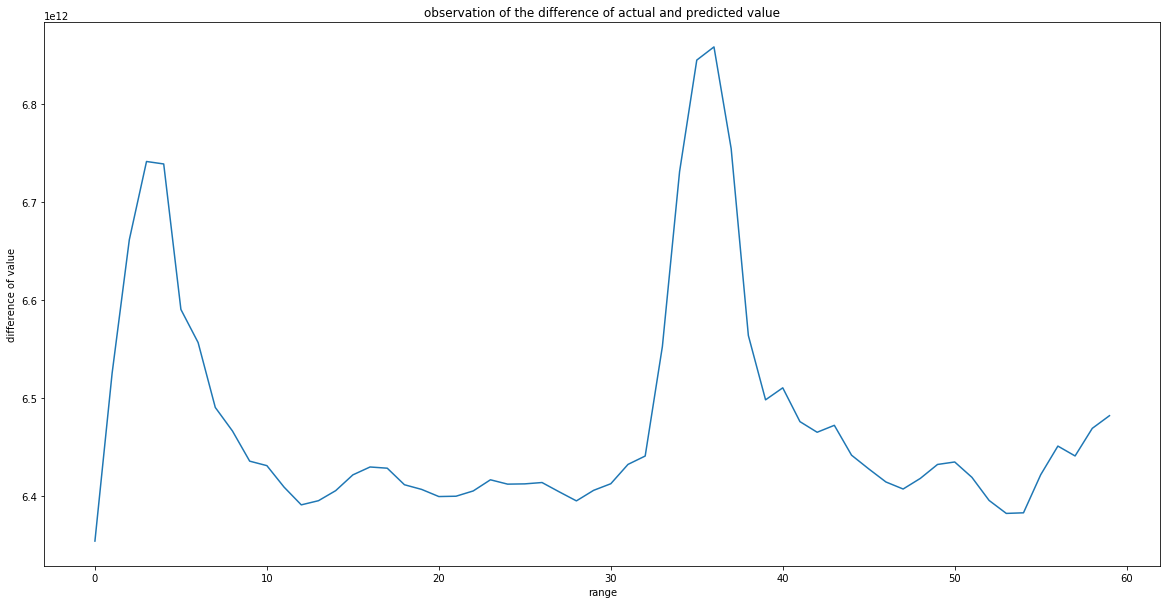

In [40]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('Slope:' ,clf.coef_)
print('Intercept:', clf.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

Slope: [ 1.57439035e+10  2.10571784e+10 -5.62867358e+09  5.08797727e+10]
Intercept: [-4.66050103e+08]
r_2 statistic: -5299257306772910863548416.00
Mean_absolute_error: 6286522118040.73
Mean squared error: 39545198662336390256132096.00
RMSE:  6288497329437.009


In [47]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(7137, 4)
(7137,)
(793, 4)
(793,)


In [50]:
train_output_1 = np.reshape(train_output,(-1,1))
print(train_output_1.shape)

test_output_1 = np.reshape(test_output,(-1,1))
print(test_output_1.shape)

(7137, 1)
(793, 1)


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\atif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: huber n_iter: 5 intercept, coef: [0.002988698590820214, 0.2901790390584849] SSE: 168045440.545442
(7137, 4)
(0, 0) 	 huber
done
Loss: huber n_iter: 500 intercept, coef: [0.002644344641402161, 0.24279089694009992] SSE: 285372276.0003882
(7137, 4)
(0, 0) 	 huber


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: huber n_iter: 1000 intercept, coef: [0.0027716563823708593, 0.23583472575327552] SSE: 293481244.59605795
(7137, 4)
(0, 0) 	 huber


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: huber n_iter: 5000 intercept, coef: [0.0038330151435144013, 0.20754299833993495] SSE: 296405004.0295179
(7137, 4)
(0, 0) 	 huber
done
Loss: epsilon_insensitive n_iter: 5 intercept, coef: [0.0028166159251139826, 0.2726711224442579] SSE: 196267941.5759963
(7137, 4)


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(0, 1) 	 epsilon_insensitive
done
Loss: epsilon_insensitive n_iter: 500 intercept, coef: [0.0043579230944274655, 0.19382663172596393] SSE: 280551497.33423847
(7137, 4)
(0, 1) 	 epsilon_insensitive


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: epsilon_insensitive n_iter: 1000 intercept, coef: [0.005914521849134574, 0.15148404501998342] SSE: 298416958.0791562
(7137, 4)
(0, 1) 	 epsilon_insensitive


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: epsilon_insensitive n_iter: 5000 intercept, coef: [0.016273267490202307, -0.11592008123176778] SSE: 282752863.59843683
(7137, 4)
(0, 1) 	 epsilon_insensitive
done
Loss: squared_epsilon_insensitive n_iter: 5 intercept, coef: [0.002355925049257899, 0.23639236065501973] SSE: 271298174.0707804
(7137, 4)
(1, 0) 	 squared_epsilon_insensitive


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: squared_epsilon_insensitive n_iter: 500 intercept, coef: [-0.000139190280641439, 0.07274008583666479] SSE: 281485242.76169604
(7137, 4)
(1, 0) 	 squared_epsilon_insensitive


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: squared_epsilon_insensitive n_iter: 1000 intercept, coef: [-0.002130279592170197, -0.05468252318414454] SSE: 316638941.9397705
(7137, 4)
(1, 0) 	 squared_epsilon_insensitive


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: squared_epsilon_insensitive n_iter: 5000 intercept, coef: [-0.015665731191792997, -0.8366215749634183] SSE: 329030368.88501775
(7137, 4)
(1, 0) 	 squared_epsilon_insensitive
done
Loss: squared_loss n_iter: 5 intercept, coef: [0.002522683380558298, 0.24955699578601875] SSE: 224862856.76739362
(7137, 4)
(1, 1) 	 squared_loss


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: squared_loss n_iter: 500 intercept, coef: [0.0011370074077416599, 0.14767845268224739] SSE: 294938459.20639896
(7137, 4)
(1, 1) 	 squared_loss


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: squared_loss n_iter: 1000 intercept, coef: [0.00020361608295535244, 0.07972995265729842] SSE: 330612692.68629855
(7137, 4)
(1, 1) 	 squared_loss


C:\Users\atif\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


done
Loss: squared_loss n_iter: 5000 intercept, coef: [-0.005990404575111008, -0.34014622302664826] SSE: 317157441.6918683
(7137, 4)
(1, 1) 	 squared_loss


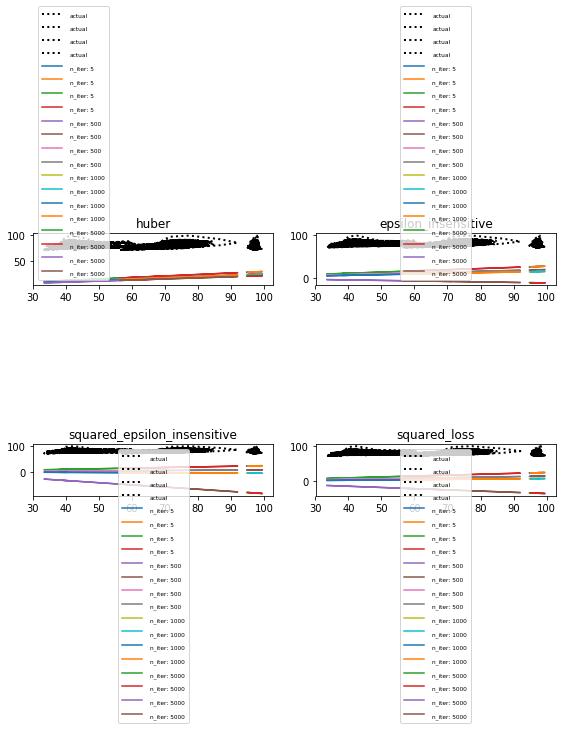

In [63]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from random import random
import matplotlib.pyplot as plt
import itertools

# X = np.array(range(1000))
# y = np.array([x + random() for x in X])
# X = X.reshape(-1,1)

fig,ax = plt.subplots(2, 2, figsize=(8,6))
coords = itertools.product([0,1], repeat=2)

for coord,loss in zip(coords, ['huber', 'epsilon_insensitive',
                               'squared_epsilon_insensitive', 'squared_loss']):
    row,col = coord
    ax[row][col].plot(train_input,train_output, 'k:', label='actual', linewidth=2)
    for iteration in [5, 500, 1000, 5000]: # or try range(1, 11)
        sgd = SGDRegressor(loss=loss, n_iter=iteration, eta0=0.00001, power_t=0.15)
        sgd.fit(train_input, train_output_1)
        y_pred = sgd.intercept_[0] + (sgd.coef_[0] * train_input)
        print('done')
        print('Loss:', loss, 'n_iter:', iteration, 'intercept, coef:',[sgd.intercept_[0], sgd.coef_[0]], 'SSE:', ((train_output_1 - sgd.predict(test_input))**2).sum())
        print(y_pred.shape)
        ax[row][col].plot(train_input, y_pred, label='n_iter: '+str(iteration))
        ax[row][col].legend()
        ax[row][col].set_title(loss)
        plt.setp(ax[row][col].legend_.get_texts(), fontsize='xx-small')
        print(coord,'\t',loss)

plt.tight_layout()
plt.show()